In [86]:
import ContourOperations as cops
import cv2
import matplotlib.pyplot as plt


In [137]:
image = cv2.imread("im15.jpg")
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
list1 = cops.findContours(thresh)

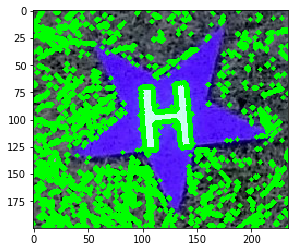

In [127]:
i = cv2.drawContours(image, list1, -1, (0,255,0), 3)
plt.imshow(i)

In [138]:
list1.sort(key = lambda s: -len(s))

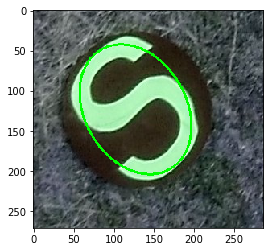

In [139]:
ellipse = cv2.fitEllipse(list1[0])
test = cv2.ellipse(image,ellipse,(0,255,0),2)
plt.imshow(test)

In [140]:
ellipse

((126.90093994140625, 123.00363159179688),
 (126.19450378417969, 171.43055725097656),
 150.20095825195312)

In [132]:
x,y,w,h = cv2.boundingRect(list1[1])

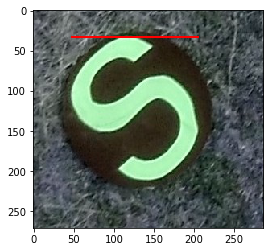

In [90]:
i1 = cv2.line(image,(int(x), int(y)),(int(x+w),int(y)),(255,0,0),2)
plt.imshow(i1)

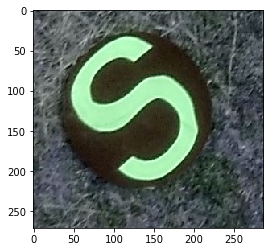

In [101]:
plt.imshow(image)

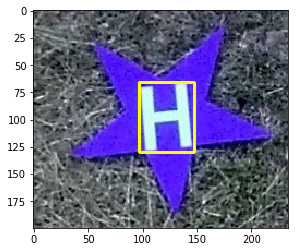

In [133]:
image = cv2.imread("crop1.jpeg")
i1 = cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(i1)

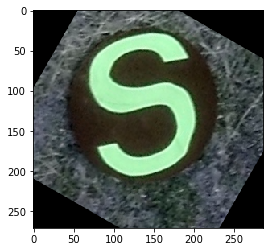

In [103]:
M = cv2.getRotationMatrix2D((cols/2, rows/2),180+angle,1)
dst = cv2.warpAffine(image ,M,(cols,rows))
plt.imshow(dst)

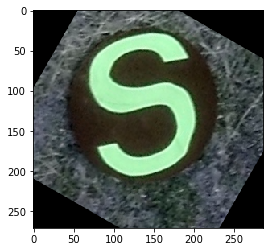

In [109]:
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

M[0, 2] += (nW / 2) - cols
M[1, 2] += (nH / 2) - rows

v = [x,y,1]
calculated = np.dot(M,v)
newCC1 = (calculated[0],calculated[1])

v = [x+w,y,1]
calculated = np.dot(M,v)
newCC2 = (calculated[0],calculated[1])
i2 = cv2.line(dst,(int(-newCC1[0]), int(-newCC1[1])),(int(-newCC2[0]), int(-newCC2[1])),(255,0,0),2)
plt.imshow(i2)

In [112]:
cv2.imwrite("rotated.png", dst)

True

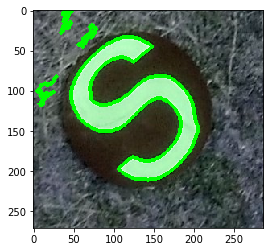

In [135]:
image = cv2.imread("im15.jpg")
i = cv2.drawContours(image, list3, -1, (0,255,0), 3)
plt.imshow(i)

In [136]:
x,y,w,h = cv2.boundingRect(list1[1])

In [137]:
i1 = cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)

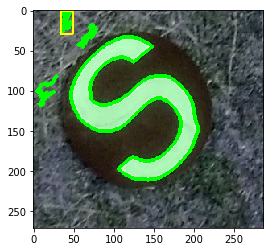

In [138]:
plt.imshow(i1)

In [95]:
import pytesseract as tsrct
from PIL import Image

In [142]:
cv2.imwrite("t1.png", targetCrop)

True

In [143]:
tsrct.image_to_string(Image.open("t1.png"), config='-psm 10000')

'9'

In [144]:
targetCrop = thresh[y:y+h, x:x+h]

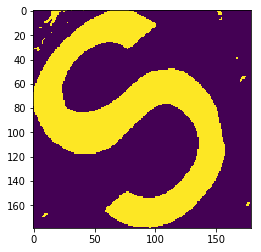

In [145]:
plt.imshow(targetCrop)

In [46]:
center, axis,angle = cv2.fitEllipse(list1[0])

In [47]:
axis

(126.19450378417969, 171.43055725097656)

In [48]:
center

(126.90093994140625, 123.00363159179688)

In [49]:
angle

150.20095825195312

In [52]:
rows, cols = cv2.imread('im15.jpg',0).shape
M = cv2.getRotationMatrix2D((center[1], center[0]),angle,1)
dst = cv2.warpAffine(image,M,(cols,rows))

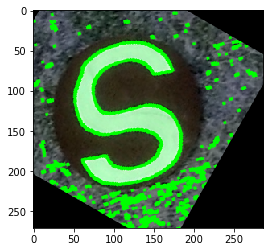

In [53]:
plt.imshow(dst)

In [70]:
from PIL import Image
import pytesseract as tsrct
import numpy as np

In [27]:
tsrct.image_to_string(Image.open("final.png"), config='-psm 10')

'g'

In [55]:
contr = list1[0]/2
center, axis,angle = cv2.fitEllipse(list1[0])
M = cv2.getRotationMatrix2D((center[1], center[0]),angle,1)
dst = cv2.warpAffine(image,M,(cols,rows))

In [60]:
center, axis,angle = cv2.fitEllipse(list1[0])

In [61]:
center


(126.90093994140625, 123.00363159179688)

In [65]:
i1 = cv2.line(image,(127, 123),(int(cols/2),int(rows/2)),(255,0,0),5)

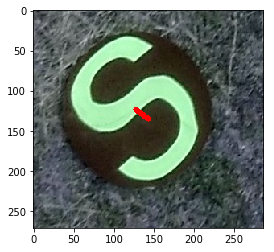

In [66]:
plt.imshow(i1)

In [67]:
rows/2

135.5

In [68]:
cols/2

143.5

In [72]:
x_shift = (cols/2) - center[0]
y_shift = (rows/2) - center[1]
M = np.float32([[1,0,x_shift],[0,1,y_shift]])
dst = cv2.warpAffine(image,M,(cols,rows))

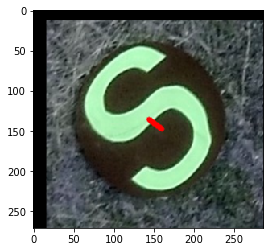

In [73]:
plt.imshow(dst)

In [83]:
dst.shape

(271, 287, 3)

In [82]:
image[int(rows/2)][144]

array([255,   0,   0], dtype=uint8)

In [85]:
center, axis,angle = cv2.fitEllipse(list1[0])
M = cv2.getRotationMatrix2D((center[1], center[0]),angle,1)
dst1 = cv2.warpAffine(image,M,(cols,rows))

In [113]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [123]:
i3 = rotate_bound(image, angle-90)

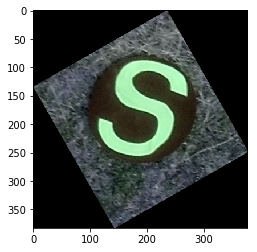

In [124]:
plt.imshow(i3)

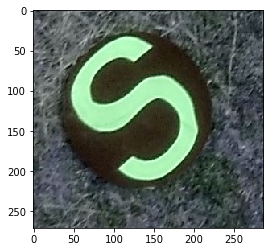

In [116]:
plt.imshow(image)

In [125]:
def rotate_box(bb, cx, cy, h, w):
    new_bb = list(bb)
    for i,coord in enumerate(bb):
        # opencv calculates standard transformation matrix
        M = cv2.getRotationMatrix2D((cx, cy), theta, 1.0)
        # Grab  the rotation components of the matrix)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        # compute the new bounding dimensions of the image
        nW = int((h * sin) + (w * cos))
        nH = int((h * cos) + (w * sin))
        # adjust the rotation matrix to take into account translation
        M[0, 2] += (nW / 2) - cx
        M[1, 2] += (nH / 2) - cy
        # Prepare the vector to be transformed
        v = [coord[0],coord[1],1]
        # Perform the actual rotation and return the image
        calculated = np.dot(M,v)
        new_bb[i] = (calculated[0],calculated[1])
    return new_bb

In [141]:
import tesseract

ModuleNotFoundError: No module named 'tesseract'